In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [3]:
loaded_data = np.genfromtxt("../../data/3992_good.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

## MLE

----------------------------------------------------------------------------
Goodness of fit
  Vexp[0]: 𝛘2 = 0.830836  RMSD  = 2.034388e-02
----------------------------------------------------------------------------
Fitted parameters and 95%-confidence intervals
Vfit[0]:
  V0:  1.01  Signal scale (arb.u.)
  bgparam[0]:   0.1000877  (0.0235588, 0.1766165)  Decay Rate (μs⁻¹)
  exparam[0]:   0.5046711  (0.4719448, 0.5373973)  Modulation depth ()
----------------------------------------------------------------------------


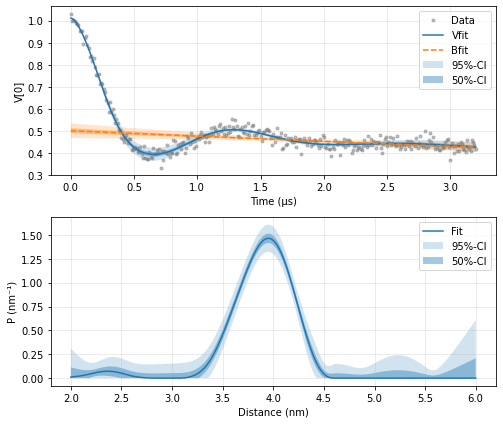

lg(α) = 0.25


In [4]:
r_dl = np.linspace(2,6,200)

fit = dl.fitmodel(Vexp,t,r_dl,'P',dl.bg_exp,dl.ex_4pdeer,verbose=True)
fit.plot();

print('lg(α) = ' + str(round(np.log10(fit.regparam),2)))

## Bayes

In [5]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 2000,"tune": 500, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 648 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The acceptance probability does not match the target. It is 0.8863236942912257, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8912455388506564, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9018325660166283, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


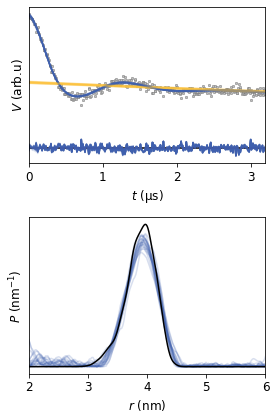

In [54]:
dive.plotTikhonovSamples(trace,  model, nDraws = 20, Pid = 3992, r_ticks = np.arange(2,7,1), t_ticks = np.arange(0,4,1))

In [56]:

axs = dive.correlationplots(trace, model, ['k', 'lamb'], size = (2,2))

yticks = np.arange(0.48,0.54,0.02)

axs.set_yticks(yticks)
axs.set_ylim((min(yticks), max(yticks)))

xticks = np.arange(0.03,0.07,0.01)
axs.set_xticks(xticks)
axs.set_xlim((min(xticks), 0.06))

axs.xaxis.get_label().set_fontsize(10)
axs.yaxis.get_label().set_fontsize(10)

axs.tick_params(axis='both', which='major', labelsize=10)

plt.show()
